In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_excel('it_sp_customers_q1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77031 entries, 0 to 77030
Data columns (total 16 columns):
CUSTOMER_ID      77031 non-null int64
TIER             77031 non-null object
ORDERS           77031 non-null int64
SALES            77031 non-null float64
NET_SALES        77031 non-null float64
BASKET_AVG       77031 non-null float64
CM1              77031 non-null float64
CM1_AVG          77031 non-null float64
CM1%             77027 non-null float64
%_NEG_CM1_ORD    77031 non-null float64
LOSS_IN_CM1      77031 non-null float64
CM2              77031 non-null float64
CM2_AVG          77031 non-null float64
CM2%             77027 non-null float64
%_NEG_CM2_ORD    77031 non-null float64
LOSS_IN_CM2      77031 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 9.4+ MB


In [4]:
data.sample(10)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
51396,5118732,[52],1,126.02,103.30,126.02,11.56,11.56,11.20,0.0,0.0,2.29,2.29,2.21,0.0,0.00
60067,10266071,[52],1,214.34,175.69,214.34,61.03,61.03,34.74,0.0,0.0,42.09,42.09,23.96,0.0,0.00
28931,14037080,[51],1,141.38,115.89,141.38,16.83,16.83,14.52,0.0,0.0,3.39,3.39,2.92,0.0,0.00
39042,13101714,[51],1,104.74,85.85,104.74,15.44,15.44,17.99,0.0,0.0,7.37,7.37,8.58,0.0,0.00
74171,19659195,[56],2,68.18,55.89,34.09,22.49,11.24,40.23,0.0,0.0,5.60,2.80,10.03,0.0,0.00
35432,16308860,[51],2,162.97,133.58,81.48,26.48,13.24,19.82,0.0,0.0,11.97,5.98,8.96,0.0,0.00
17879,12845972,[53],1,91.07,74.65,91.07,21.61,21.61,28.95,0.0,0.0,10.74,10.74,14.38,0.0,0.00
44219,9762874,[51],1,52.68,43.18,52.68,8.94,8.94,20.70,0.0,0.0,-0.34,-0.34,-0.78,100.0,-0.34
38587,17002928,[56],2,325.17,266.53,162.58,63.08,31.54,23.67,0.0,0.0,22.03,11.01,8.26,50.0,-4.03
22104,16382611,[56 52],10,930.77,763.10,93.08,270.25,27.03,35.41,0.0,0.0,140.23,14.02,18.38,0.0,0.00


In [5]:
data[['ORDERS', 'BASKET_AVG', 'CM2', 'CM2%']].fillna(0).describe().round(2)

,ORDERS,BASKET_AVG,CM2,CM2%
count,77031.00,77031.00,77031.00,77031.00
mean,2.07,83.11,16.71,1062.99
std,1.92,51.48,23.18,327642.98
min,1.00,0.00,-577.41,-33130900.00
25%,1.00,50.91,4.13,5.51
50%,2.00,70.28,10.81,11.15
75%,3.00,99.96,22.30,16.66
max,265.00,3019.01,765.23,75025700.00


In [6]:
data['TIER'].unique()

array(['[54]', '[54 53]', '[52]', '[52 51]', '[52 53]', '[52 54]', '[57]',
       '[53]', '[51]', '[51 52]', '[53 54]', '[56]', '[56 52]', '[56 51]',
       '[55 51]', '[55]', '[56 53]', '[56 54]', '[55 52]', '[55 53]',
       '[51 54]', '[51 53]', '[204]', '[201]', '[54 52]'], dtype=object)

In [7]:
selected_tiers = ['[51]',
 '[52]',
 '[53]',
 '[54]',
 '[55]',
 '[56]'
 ]
selected_tiers

['[51]', '[52]', '[53]', '[54]', '[55]', '[56]']

In [8]:
data = data[data['TIER'].isin(selected_tiers)]

In [9]:
data['CUSTOMER_ID'].nunique()

75704

In [10]:
tiers = [51, 52, 53, 54, 55, 56]

In [11]:
def get_number_from_string(i):
    changes = i.replace('[', '').replace(']', '')
    return int(changes)

In [12]:
data['TIER'] = data['TIER'].map(get_number_from_string)

In [13]:
data.head()

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,1649336,54,1,35.08,28.75,35.08,12.39,12.39,43.10,0.0,0.0,5.81,5.81,20.21,0.00,0.00
2,8917417,54,1,87.32,71.57,87.32,21.69,21.69,30.31,0.0,0.0,10.74,10.74,15.00,0.00,0.00
3,4810643,54,6,365.54,299.62,60.92,79.87,13.31,26.66,0.0,0.0,26.88,4.48,8.97,33.33,-1.82
4,3795353,54,7,850.45,697.09,121.49,265.41,37.92,38.07,0.0,0.0,61.88,8.84,8.88,42.86,-11.91
5,8482234,54,1,41.78,34.25,41.78,12.57,12.57,36.69,0.0,0.0,5.70,5.70,16.64,0.00,0.00


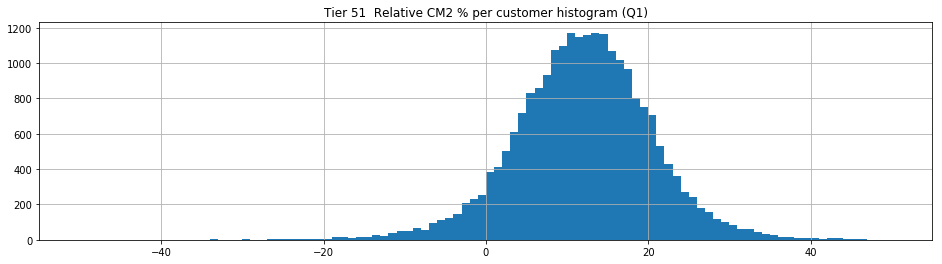

,CM2%
count,22978.000000
mean,9.319248
std,224.789555
min,-26911.950000
25%,6.760000
50%,12.100000
75%,17.250000
max,53.920000


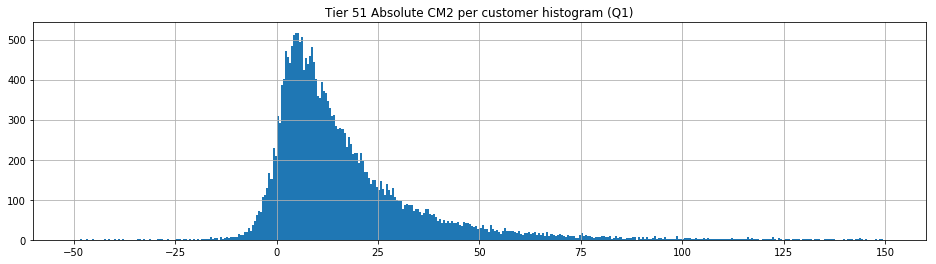

,CM2
count,22979.000000
mean,16.820779
std,20.687547
min,-122.740000
25%,4.845000
50%,11.310000
75%,22.080000
max,326.720000


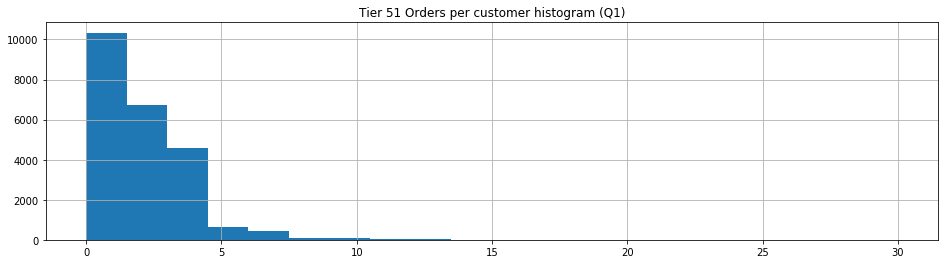

,ORDERS
count,22979.000000
mean,2.065669
std,1.563242
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,49.000000


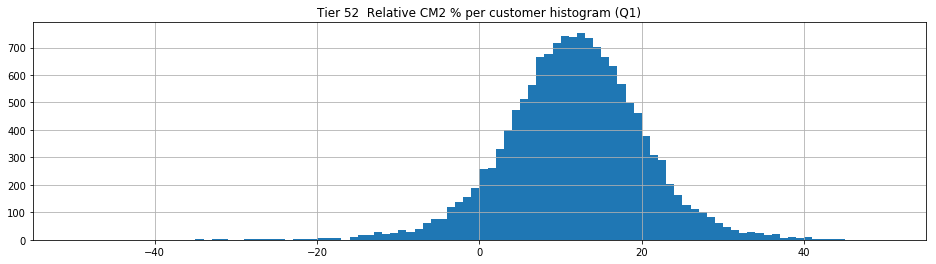

,CM2%
count,1.456500e+04
mean,5.161906e+03
std,6.216626e+05
min,-2.731060e+03
25%,6.500000e+00
50%,1.172000e+01
75%,1.695000e+01
max,7.502570e+07


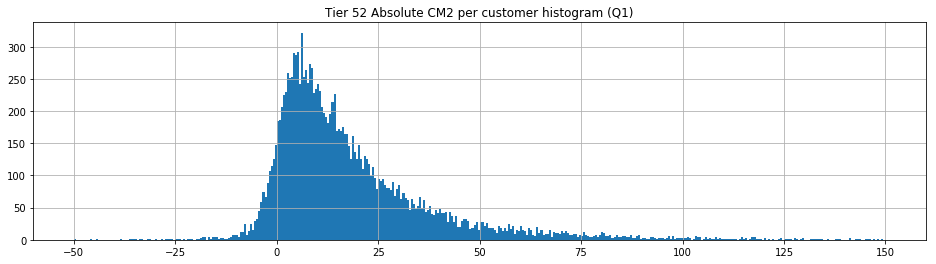

,CM2
count,14565.000000
mean,19.095766
std,25.298925
min,-399.200000
25%,5.240000
50%,12.740000
75%,25.290000
max,335.570000


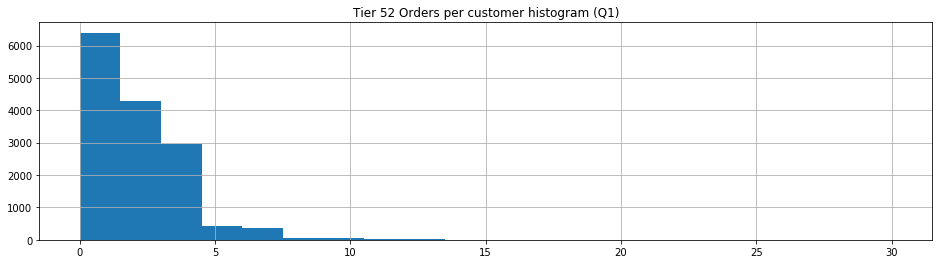

,ORDERS
count,14565.000000
mean,2.104428
std,1.542588
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,30.000000


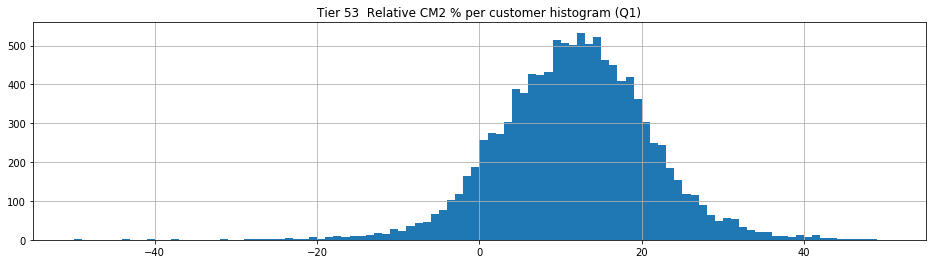

,CM2%
count,1.123900e+04
mean,-2.938074e+03
std,3.125141e+05
min,-3.313090e+07
25%,5.760000e+00
50%,1.183000e+01
75%,1.758000e+01
max,5.847000e+01


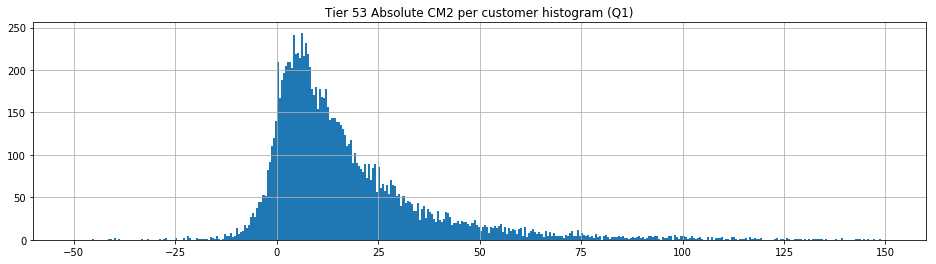

,CM2
count,11239.000000
mean,17.291217
std,22.228596
min,-87.750000
25%,4.400000
50%,11.370000
75%,23.345000
max,385.190000


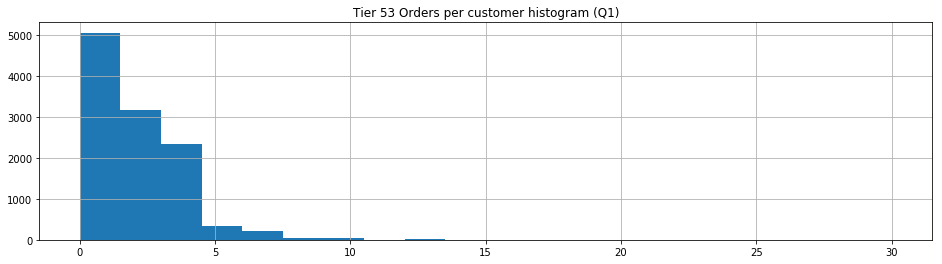

,ORDERS
count,11239.000000
mean,2.071626
std,1.504024
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,44.000000


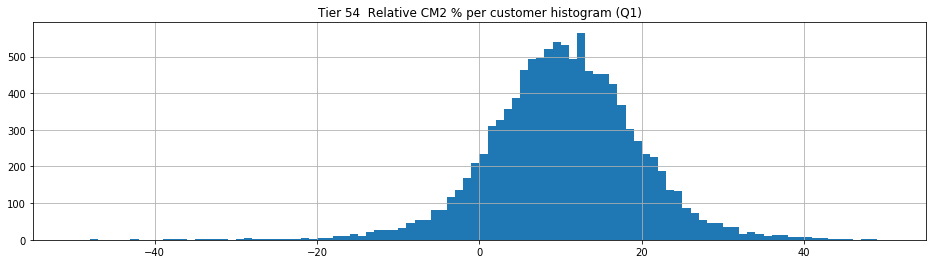

,CM2%
count,1.109700e+04
mean,3.548274e+03
std,3.728577e+05
min,-4.860270e+03
25%,4.800000e+00
50%,1.039000e+01
75%,1.604000e+01
max,3.927770e+07


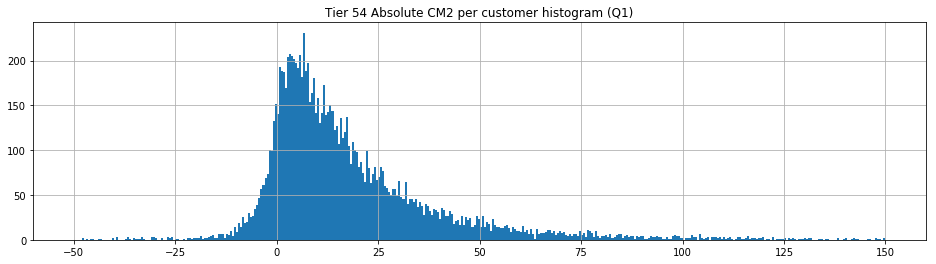

,CM2
count,11099.000000
mean,18.691873
std,28.363676
min,-577.410000
25%,4.140000
50%,11.970000
75%,25.475000
max,765.230000


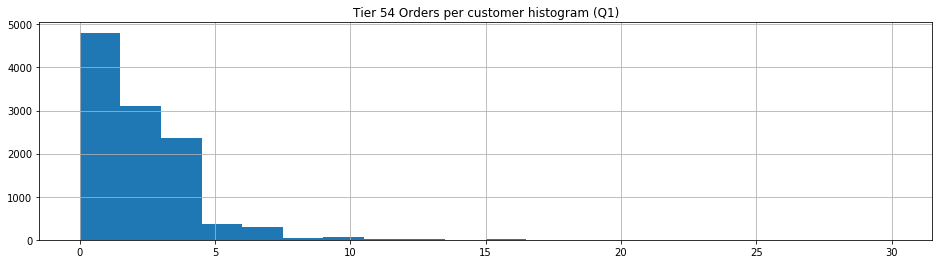

,ORDERS
count,11099.000000
mean,2.192900
std,2.021421
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,113.000000


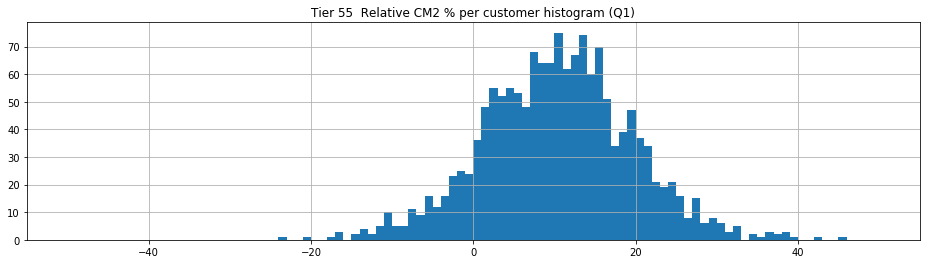

,CM2%
count,1513.000000
mean,9.038103
std,44.690295
min,-1665.310000
25%,4.120000
50%,10.340000
75%,16.070000
max,45.550000


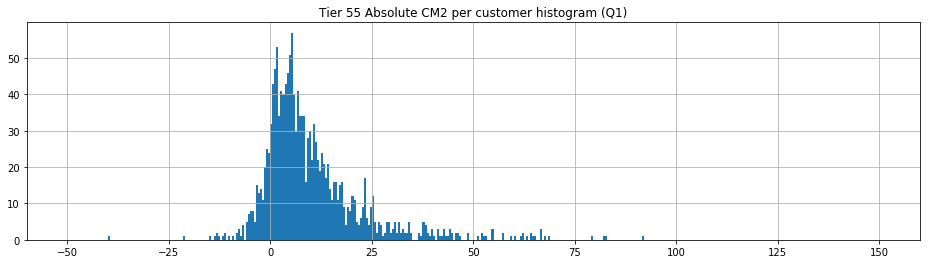

,CM2
count,1513.000000
mean,9.962419
std,13.138696
min,-140.100000
25%,2.360000
50%,6.770000
75%,13.930000
max,91.790000


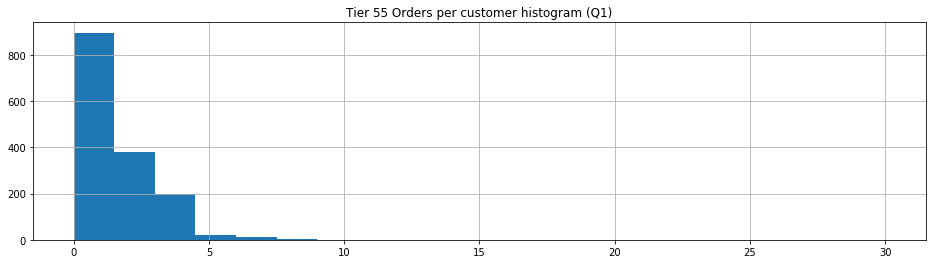

,ORDERS
count,1513.000000
mean,1.681428
std,1.128763
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,13.000000


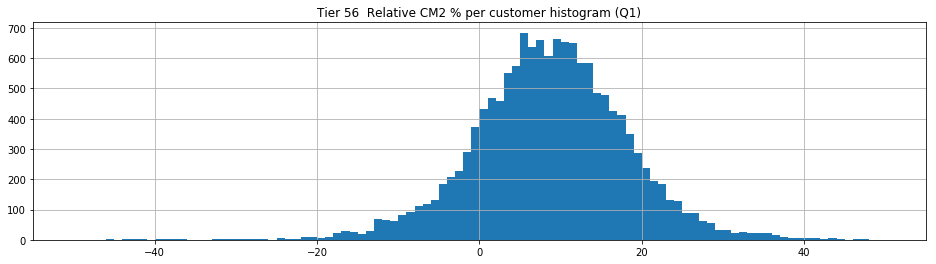

,CM2%
count,14308.000000
mean,7.030012
std,110.470970
min,-12575.240000
25%,2.930000
50%,8.700000
75%,14.510000
max,53.010000


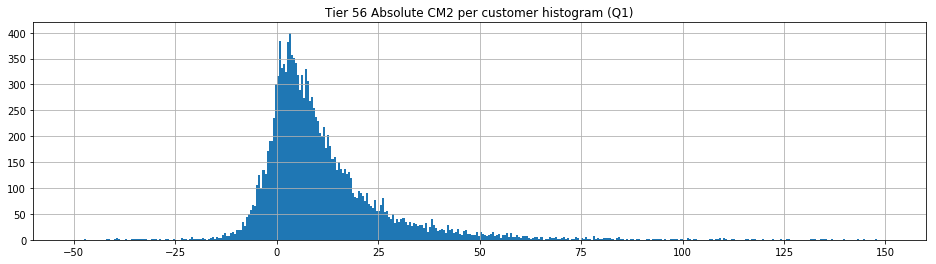

,CM2
count,14309.000000
mean,11.374599
std,19.224473
min,-117.850000
25%,1.940000
50%,7.260000
75%,15.740000
max,731.830000


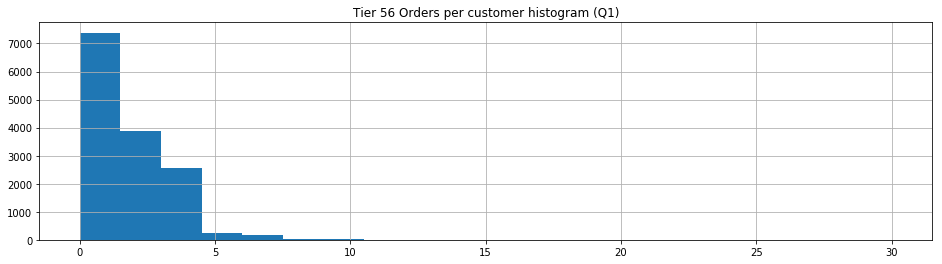

,ORDERS
count,14309.000000
mean,1.886225
std,2.798927
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,265.000000


In [14]:
for tq in tiers:
    data_tier = data[data['TIER'] == tq]
    
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].describe()))
        
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))

In [15]:
data_simulation = data.copy()

In [16]:
data_simulation['ORDERS'] = data_simulation['ORDERS'] * 3
data_simulation['CM2'] = data_simulation['CM2'] * 3

In [17]:
sim = data_simulation[['CUSTOMER_ID', 'TIER', 'ORDERS', 'CM2', 'CM2%']]

...........................................................TIER  51 ..........................................................


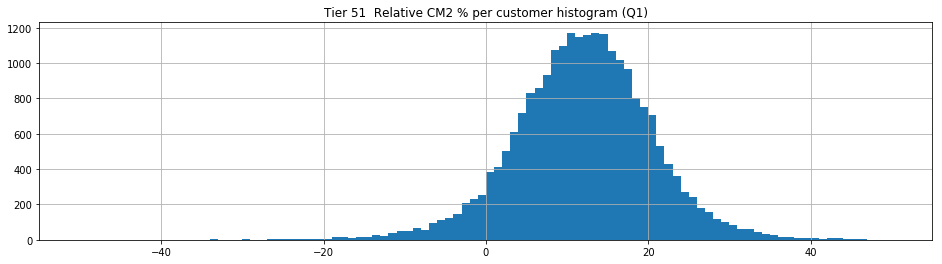

,CM2%
count,22979.000000
mean,9.318842
std,224.784672
min,-26911.950000
25%,6.760000
50%,12.100000
75%,17.250000
max,53.920000


C:\Users\albertoma\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1796: RuntimeWarning: invalid value encountered in less
  return np.sum(a < score) / float(n) * 100


CM2% threshold >= 5  is the percentile 18.54
CM2% threshold >= 7  is the percentile 25.88
CM2% threshold >=  8.01  is the percentile 30 allowing us to stay with the 70% of our sample


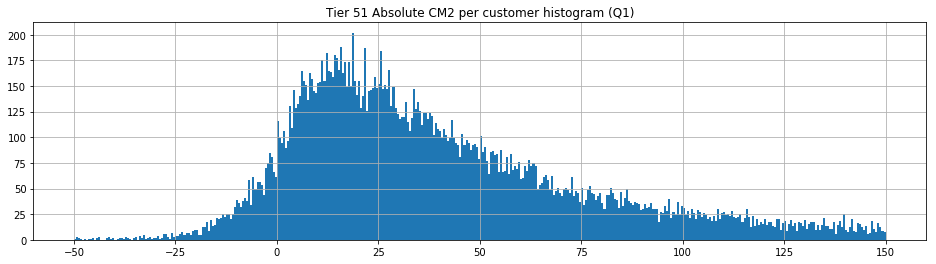

,CM2
count,22979.000000
mean,50.462337
std,62.062642
min,-368.220000
25%,14.535000
50%,33.930000
75%,66.240000
max,980.160000


17.85  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  17.85  we keep eligible a  68.65  % from our customers
With CM2% threshold >= 7 and CM2 >=  17.85  we keep eligible a  65.34  % from our customers
With CM2% threshold >=  8.01  and CM2 >=  17.85  we keep eligible a  62.87  % from our customers


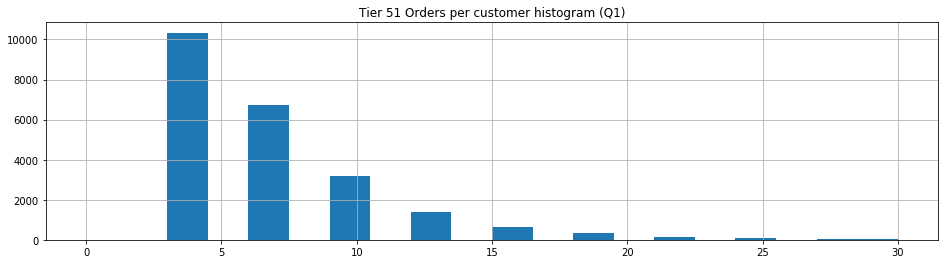

,ORDERS
count,22979.000000
mean,6.197006
std,4.689725
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,147.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  81.45  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  74.11  % from our customers
With CM2% threshold >=  8.01  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


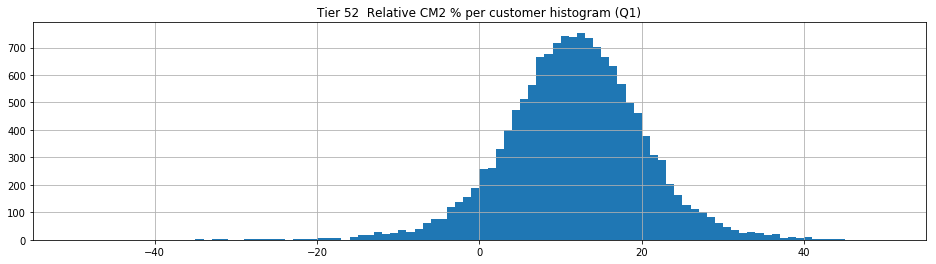

,CM2%
count,1.456500e+04
mean,5.161906e+03
std,6.216626e+05
min,-2.731060e+03
25%,6.500000e+00
50%,1.172000e+01
75%,1.695000e+01
max,7.502570e+07


CM2% threshold >= 5  is the percentile 19.59
CM2% threshold >= 7  is the percentile 26.96
CM2% threshold >=  7.65  is the percentile 30 allowing us to stay with the 70% of our sample


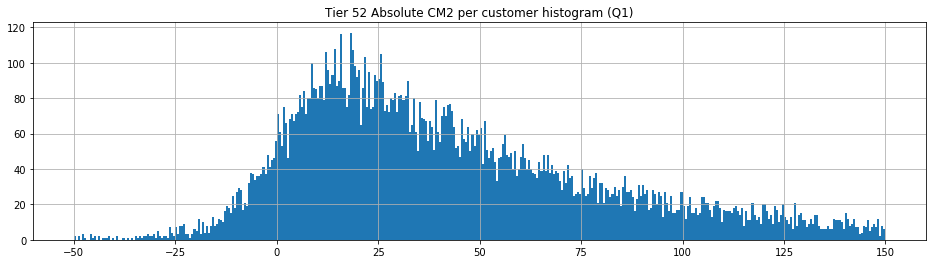

,CM2
count,14565.000000
mean,57.287298
std,75.896774
min,-1197.600000
25%,15.720000
50%,38.220000
75%,75.870000
max,1006.710000


19.53  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  19.53  we keep eligible a  68.66  % from our customers
With CM2% threshold >= 7 and CM2 >=  19.53  we keep eligible a  64.92  % from our customers
With CM2% threshold >=  7.65  and CM2 >=  19.53  we keep eligible a  63.04  % from our customers


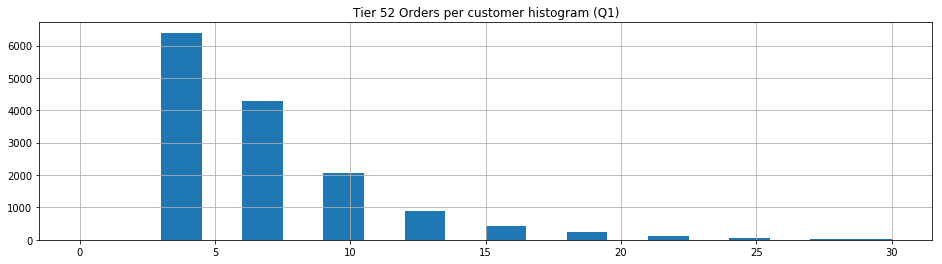

,ORDERS
count,14565.000000
mean,6.313285
std,4.627764
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,90.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  80.41  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  73.04  % from our customers
With CM2% threshold >=  7.65  and Orders >=  3.0  we keep eligible a  70.04  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


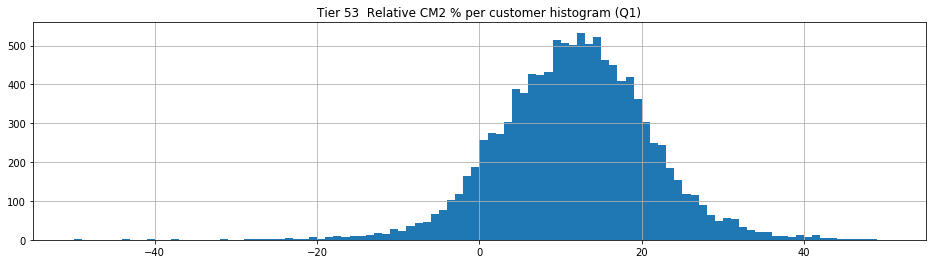

,CM2%
count,1.123900e+04
mean,-2.938074e+03
std,3.125141e+05
min,-3.313090e+07
25%,5.760000e+00
50%,1.183000e+01
75%,1.758000e+01
max,5.847000e+01


CM2% threshold >= 5  is the percentile 22.49
CM2% threshold >= 7  is the percentile 29.66
CM2% threshold >=  7.11  is the percentile 30 allowing us to stay with the 70% of our sample


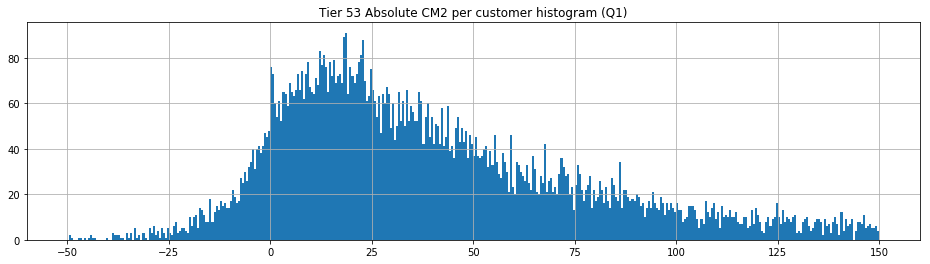

,CM2
count,11239.000000
mean,51.873652
std,66.685787
min,-263.250000
25%,13.200000
50%,34.110000
75%,70.035000
max,1155.570000


17.009999999999998  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  17.009999999999998  we keep eligible a  68.01  % from our customers
With CM2% threshold >= 7 and CM2 >=  17.009999999999998  we keep eligible a  64.04  % from our customers
With CM2% threshold >=  7.11  and CM2 >=  17.009999999999998  we keep eligible a  63.8  % from our customers


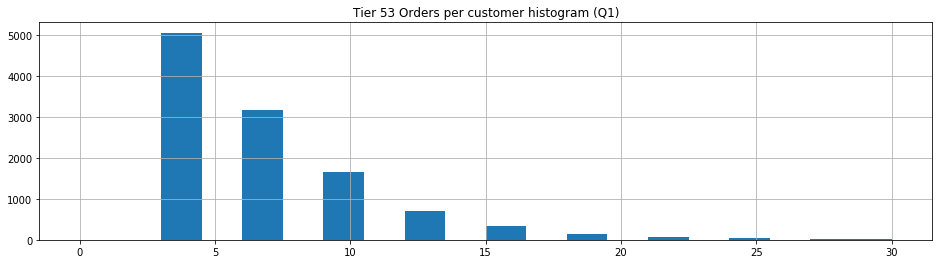

,ORDERS
count,11239.000000
mean,6.214877
std,4.512071
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,132.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  77.51  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  70.34  % from our customers
With CM2% threshold >=  7.11  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


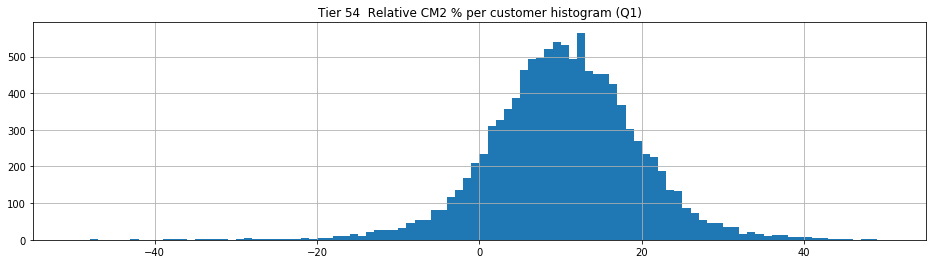

,CM2%
count,1.109900e+04
mean,3.547634e+03
std,3.728241e+05
min,-4.860270e+03
25%,4.800000e+00
50%,1.039000e+01
75%,1.603500e+01
max,3.927770e+07


CM2% threshold >= 5  is the percentile 25.55
CM2% threshold >= 7  is the percentile 34.17
CM2% threshold >=  6.04  is the percentile 30 allowing us to stay with the 70% of our sample


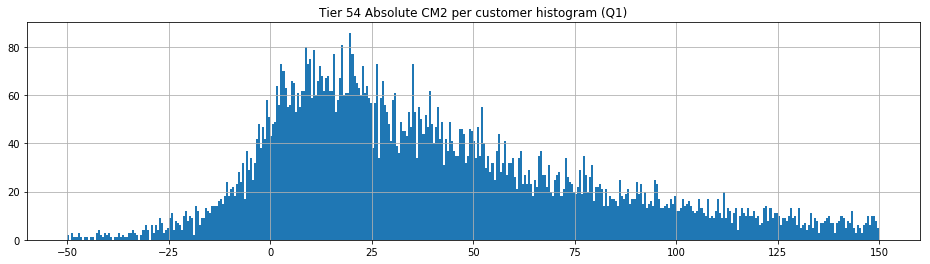

,CM2
count,11099.000000
mean,56.075619
std,85.091029
min,-1732.230000
25%,12.420000
50%,35.910000
75%,76.425000
max,2295.690000


16.68  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  16.68  we keep eligible a  67.09  % from our customers
With CM2% threshold >= 7 and CM2 >=  16.68  we keep eligible a  61.55  % from our customers
With CM2% threshold >=  6.04  and CM2 >=  16.68  we keep eligible a  64.47  % from our customers


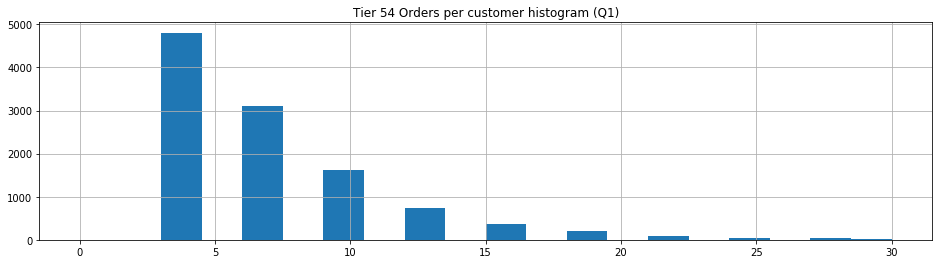

,ORDERS
count,11099.000000
mean,6.578701
std,6.064262
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,339.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  74.43  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  65.82  % from our customers
With CM2% threshold >=  6.04  and Orders >=  3.0  we keep eligible a  70.04  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


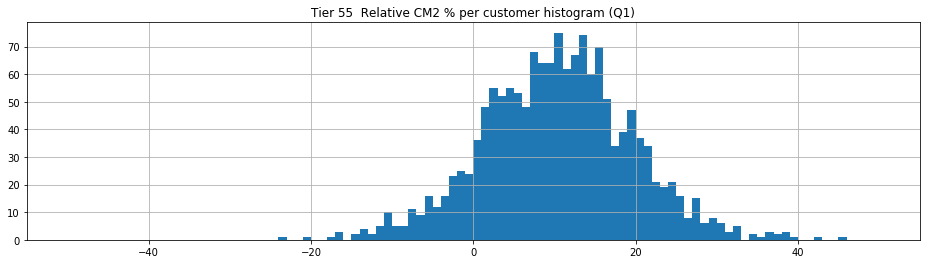

,CM2%
count,1513.000000
mean,9.038103
std,44.690295
min,-1665.310000
25%,4.120000
50%,10.340000
75%,16.070000
max,45.550000


CM2% threshold >= 5  is the percentile 28.02
CM2% threshold >= 7  is the percentile 34.7
CM2% threshold >=  5.607999999999999  is the percentile 30 allowing us to stay with the 70% of our sample


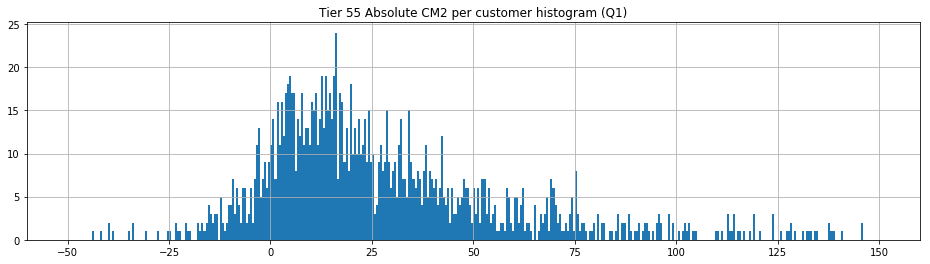

,CM2
count,1513.000000
mean,29.887257
std,39.416089
min,-420.300000
25%,7.080000
50%,20.310000
75%,41.790000
max,275.370000


10.097999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  10.097999999999999  we keep eligible a  66.82  % from our customers
With CM2% threshold >= 7 and CM2 >=  10.097999999999999  we keep eligible a  62.86  % from our customers
With CM2% threshold >=  5.607999999999999  and CM2 >=  10.097999999999999  we keep eligible a  66.16  % from our customers


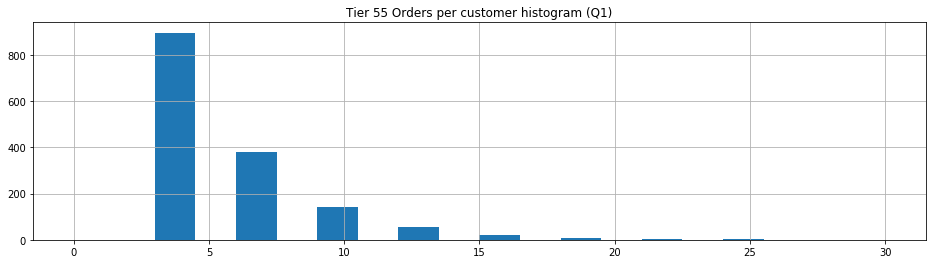

,ORDERS
count,1513.000000
mean,5.044283
std,3.386289
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,39.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  71.98  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  65.3  % from our customers
With CM2% threshold >=  5.607999999999999  and Orders >=  3.0  we keep eligible a  69.99  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


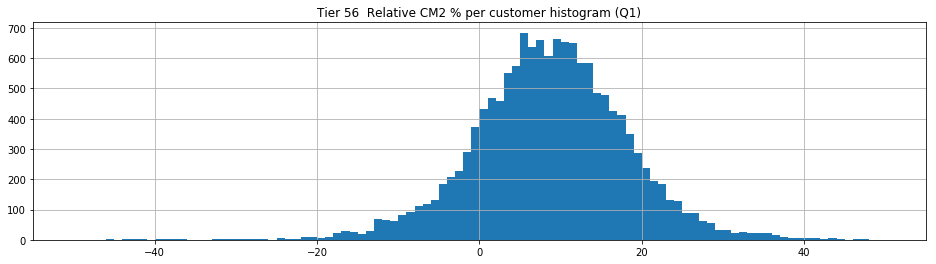

,CM2%
count,14309.000000
mean,7.029521
std,110.467125
min,-12575.240000
25%,2.930000
50%,8.700000
75%,14.510000
max,53.010000


CM2% threshold >= 5  is the percentile 33.11
CM2% threshold >= 7  is the percentile 42.33
CM2% threshold >=  4.22  is the percentile 30 allowing us to stay with the 70% of our sample


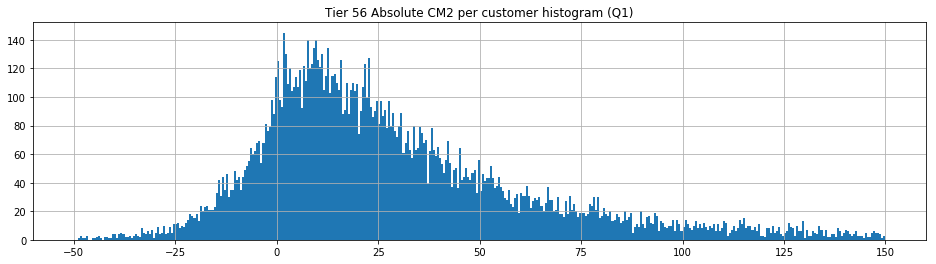

,CM2
count,14309.000000
mean,34.123796
std,57.673419
min,-353.550000
25%,5.820000
50%,21.780000
75%,47.220000
max,2195.490000


8.82  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  8.82  we keep eligible a  64.0  % from our customers
With CM2% threshold >= 7 and CM2 >=  8.82  we keep eligible a  56.68  % from our customers
With CM2% threshold >=  4.22  and CM2 >=  8.82  we keep eligible a  66.15  % from our customers


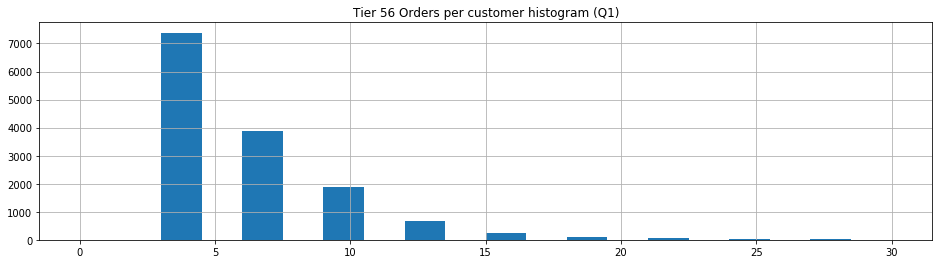

,ORDERS
count,14309.000000
mean,5.658676
std,8.396781
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,795.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  66.89  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  57.66  % from our customers
With CM2% threshold >=  4.22  and Orders >=  3.0  we keep eligible a  70.01  % from our customers
                                                                                                                    
                                                                                                                    


In [18]:
for tq in tiers:
    data_tier = sim[sim['TIER'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].fillna(0).describe()))
    perc_30_cm2_rel = data_tier['CM2%'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2%'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2%'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    perc_30_cm2_abs = data_tier['CM2'].fillna(0).quantile(.3)
    val1 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val2 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val3 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [19]:
(data['SALES'] / data['NET_SALES']).describe()

count    75697.000000
mean         1.209506
std          0.048382
min          0.071712
25%          1.219932
50%          1.219990
75%          1.220020
max          1.226667
dtype: float64